In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
boston = datasets.load_boston()

In [25]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
target = boston.target

In [27]:
print(target[:5], target.shape)

[ 24.   21.6  34.7  33.4  36.2] (506,)


In [28]:
target = np.array(target)
target = target.astype('float64')
target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [29]:
X_data = np.zeros((df.shape[0], df.shape[1]+1))

In [30]:
print(X_data.shape)

(506, 14)


In [31]:
X_data = X_data-np.mean(X_data,axis=0)

In [32]:
X_data[:, 1:] = df.values
X_data[:, 0] = 1

In [33]:
weights = np.ones(df.shape[1]+1)

In [34]:
weights.shape

(14,)

In [35]:
X_data[0, :]

array([  1.00000000e+00,   6.32000000e-03,   1.80000000e+01,
         2.31000000e+00,   0.00000000e+00,   5.38000000e-01,
         6.57500000e+00,   6.52000000e+01,   4.09000000e+00,
         1.00000000e+00,   2.96000000e+02,   1.53000000e+01,
         3.96900000e+02,   4.98000000e+00])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target, shuffle=True, test_size=0.20)

In [38]:
print(X_train.shape, X_test.shape)

(404, 14) (102, 14)


In [39]:
def predict(X, W):
    #X is a vector
    pred_y = X.T.dot(W)
    #print(pred_y)
    return X.T.dot(W)

In [40]:
def gradient_descent(X, W, y, num_iter=500, alpha=0.001):
    #X, is matrix of n*m, n = #iterations, m = #features
    num_examples = X.shape[0]
    for iteration in range(num_iter):
        
        for i in range(num_examples):
            pred_y = predict(X[i],W)
            W = W - (alpha*(pred_y-y[i])*X[i])/num_examples
    return W

In [41]:
weights = gradient_descent(X_train, weights, y_train)

In [42]:
def cost(X, W, y):
    pred_y = np.zeros(y.shape[0])
    #X is a matrix
    for i in range(y.shape[0]):
        pred_y[i] = X[i].T.dot(W)
        print(np.square(pred_y[i]-y[i]))
        print("Predicted Value = ", pred_y[i], "Actual Value = ", y[i])
    return pred_y

In [43]:
pred_y = cost(X_test,weights, y_test)

14.9016347328
Predicted Value =  28.6602635574 Actual Value =  24.8
1.57981652679
Predicted Value =  20.2569075252 Actual Value =  19.0
289.869403224
Predicted Value =  32.9744485192 Actual Value =  50.0
9.10881748961
Predicted Value =  30.7819182434 Actual Value =  33.8
7.84216204143
Predicted Value =  25.5003860522 Actual Value =  22.7
33.0805792475
Predicted Value =  20.6515718936 Actual Value =  14.9
45.4252494478
Predicted Value =  27.0398256244 Actual Value =  20.3
85.0297082896
Predicted Value =  27.7211554748 Actual Value =  18.5
52.2332534149
Predicted Value =  26.5272576691 Actual Value =  19.3
112.787160789
Predicted Value =  32.5201299799 Actual Value =  21.9
0.0723391500057
Predicted Value =  37.5689593836 Actual Value =  37.3
78.6262223589
Predicted Value =  23.1671428521 Actual Value =  14.3
25.0631292712
Predicted Value =  23.7063089468 Actual Value =  18.7
66.2475083653
Predicted Value =  16.5392572367 Actual Value =  8.4
8.55832394114
Predicted Value =  10.3254613211 

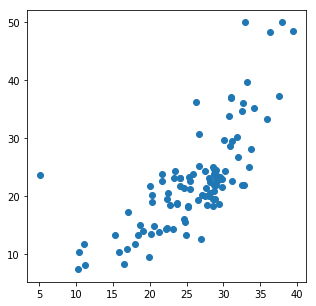

In [44]:
plt.figure(figsize=(5,5))
plt.scatter(pred_y, y_test)